In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils

import matplotlib.pyplot as plt

In [3]:
num_classes = 10

# Step 1. Data Load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [0]:
# Step 2. Model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [0]:
# Step 3. Loss,Optimizer, Metric
model.compile (optimizer= 'adam', 
                loss='categorical_crossentropy', metrics = ['accuracy'])


In [6]:
# Step 4. Train the model
history=model.fit(X_train, y_train, batch_size=100, epochs=15, verbose=2,
                  validation_split=0.2)
print(model.summary())

W0723 10:52:51.081979 140406254155648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 - 14s - loss: 0.4514 - accuracy: 0.8586 - val_loss: 0.1683 - val_accuracy: 0.9514
Epoch 2/15
48000/48000 - 14s - loss: 0.1897 - accuracy: 0.9467 - val_loss: 0.1290 - val_accuracy: 0.9615
Epoch 3/15
48000/48000 - 14s - loss: 0.1482 - accuracy: 0.9584 - val_loss: 0.1030 - val_accuracy: 0.9705
Epoch 4/15
48000/48000 - 14s - loss: 0.1213 - accuracy: 0.9657 - val_loss: 0.1038 - val_accuracy: 0.9705
Epoch 5/15
48000/48000 - 14s - loss: 0.1078 - accuracy: 0.9697 - val_loss: 0.1119 - val_accuracy: 0.9696
Epoch 6/15
48000/48000 - 14s - loss: 0.0945 - accuracy: 0.9733 - val_loss: 0.0885 - val_accuracy: 0.9756
Epoch 7/15
48000/48000 - 14s - loss: 0.0883 - accuracy: 0.9755 - val_loss: 0.0867 - val_accuracy: 0.9767
Epoch 8/15
48000/48000 - 14s - loss: 0.0816 - accuracy: 0.9763 - val_loss: 0.0926 - val_accuracy: 0.9761
Epoch 9/15
48000/48000 - 14s - loss: 0.0758 - accuracy: 0.9788 - val_loss: 0.0928 - val_accuracy: 0.9768
Epoch

In [7]:
# Step 5. Test the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss = ', test_loss, 'test_acc = ', test_acc)

10000/10000 [==============================] - 1s 144us/sample - loss: 0.0965 - accuracy: 0.9796
test_loss =  0.09653611226169842 test_acc =  0.9796


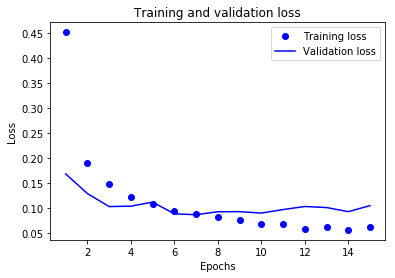

In [8]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


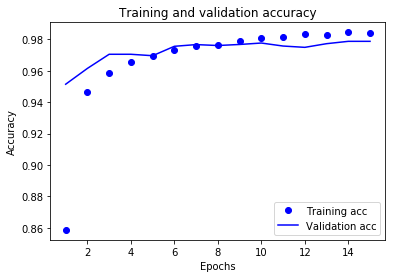

In [9]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()